***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dados=pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
classes=[0,2*788,5*788,15*788,25*788,200000]

### 2º Definir os labels das classes

In [ ]:
labels=['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [ ]:
freq_renda=pd.value_counts(pd.cut(x=dados.Renda,
                                  bins=classes,
                                  labels=labels,
                                  include_lowest=True))

### 4º Construir a coluna de percentuais

In [ ]:
percent_renda=pd.value_counts(pd.cut(x=dados.Renda,
                                  bins=classes,
                                  labels=labels,
                                  include_lowest=True),
                                  normalize=True)*100

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
distribuicao_de_renda=pd.DataFrame({'Frequência':freq_renda,'Percentual(%)':percent_renda}).sort_index(ascending=False)
distribuicao_de_renda.rename_axis('Classe',axis='columns',inplace=True)
distribuicao_de_renda

Classe,Frequência,Percentual(%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: ylabel='Frequência'>

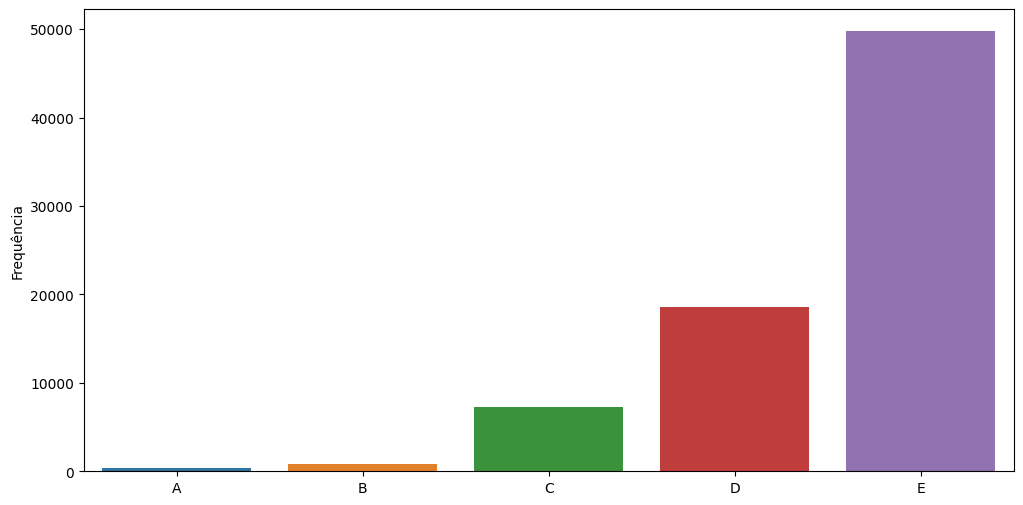

In [ ]:
ax=sns.barplot(data=distribuicao_de_renda,x=['A','B','C','D','E'], y='Frequência')
ax.figure.set_size_inches(12,6)
ax

> ### Conclusões

Escreva suas conclusões aqui...

Praticamente 88% da população são das classes E e D.
Apenas de 1,5% da população são das classe A e B.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<Axes: >

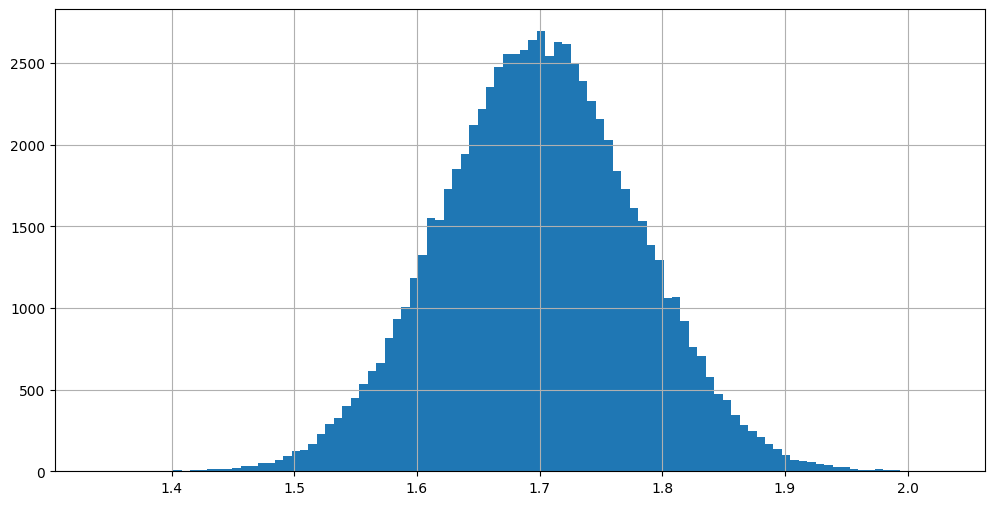

In [ ]:
dados.Altura.hist(bins=100,figsize=(12,6))

<Axes: >

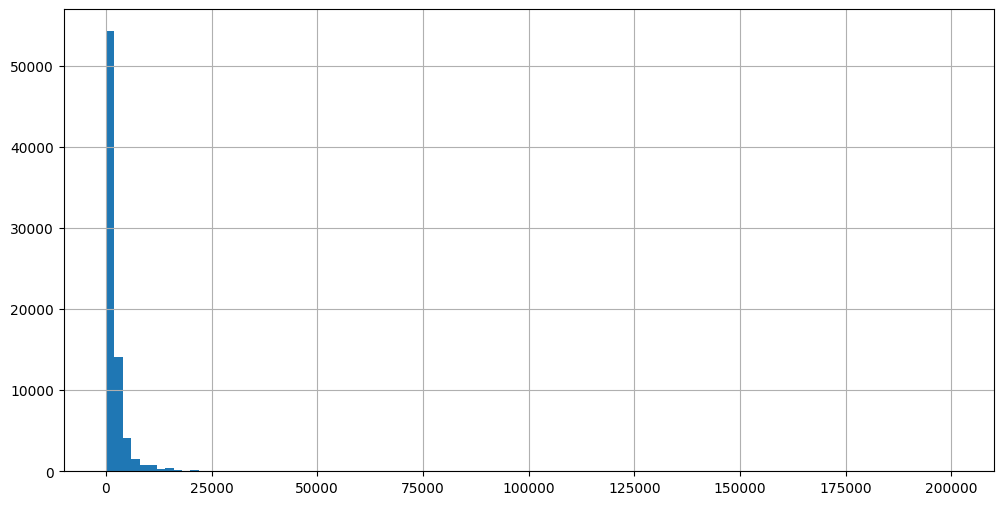

In [ ]:
dados.Renda.hist(bins=100,figsize=(12,6))

<Axes: >

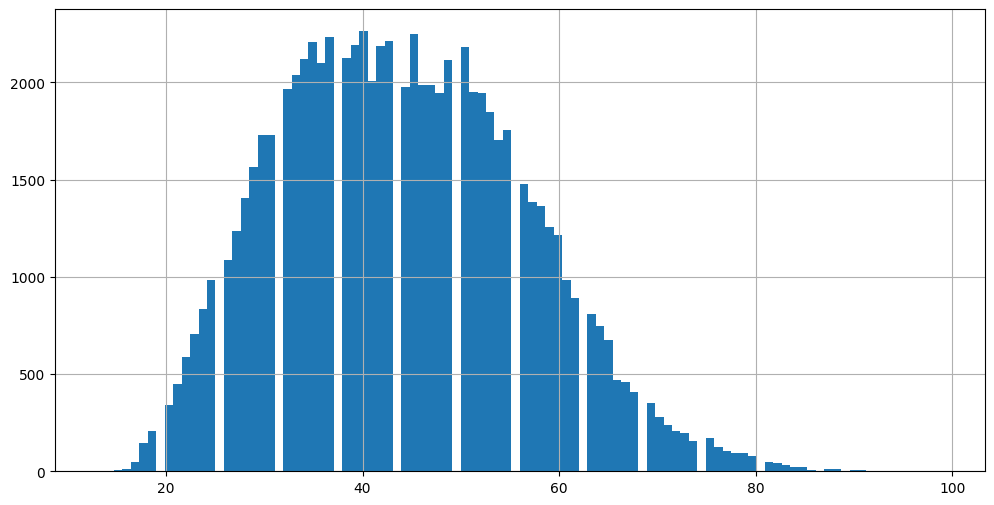

In [ ]:
dados.Idade.hist(bins=100,figsize=(12,6))

> ### Conclusões

Escreva suas conclusões aqui...
As variáveis idade e altura possuem distribuições praticamente normais, enquanto que a renda é "derivada" a direita.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<Axes: xlabel='Renda', ylabel='Count'>

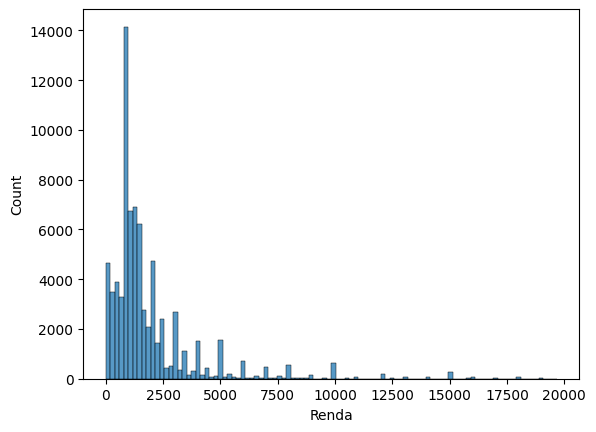

In [ ]:
sns.histplot(dados.query('Renda<20000').Renda,bins=100)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [ ]:
dados['UF']=dados['UF'].map(uf)

In [ ]:
d={'Cor':dados.Cor,'Sexo':dados.Sexo,'Renda':dados.Renda}
tabela=pd.DataFrame(d)
tabela['Sexo']=tabela['Sexo'].map(sexo)
tabela['Cor']=tabela['Cor'].map(cor)
tabela

,Cor,Sexo,Renda
0,Parda,Masculino,800
1,Branca,Feminino,1150
2,Parda,Feminino,880
3,Branca,Masculino,3500
4,Parda,Feminino,150
...,...,...,...
76835,Branca,Feminino,812
76836,Preta,Masculino,1500
76837,Parda,Masculino,1300
76838,Parda,Masculino,1500


In [ ]:
qtd_cor=tabela['Cor'].value_counts()
frq_cor=tabela['Cor'].value_counts(normalize=True)*100

In [ ]:
qtd_cor

Parda       35925
Branca      31815
Preta        8391
Indígena      357
Amarela       352
Name: Cor, dtype: int64

In [ ]:
frq_cor

Parda       46.752993
Branca      41.404217
Preta       10.920094
Indígena     0.464602
Amarela      0.458095
Name: Cor, dtype: float64

In [ ]:
qtd_sexo=tabela['Sexo'].value_counts()
frq_sexo=tabela['Sexo'].value_counts(normalize=True)*100

In [ ]:
qtd_sexo

Masculino    53250
Feminino     23590
Name: Sexo, dtype: int64

In [ ]:
frq_sexo

Masculino    69.299844
Feminino     30.700156
Name: Sexo, dtype: float64

In [ ]:
tabela2=tabela.groupby('Sexo')
tabela2

In [ ]:
qtd_cor2=tabela2['Cor'].value_counts()
qtd_cor2

Sexo       Cor     
Feminino   Parda       10862
           Branca       9621
           Preta        2889
           Amarela       117
           Indígena      101
Masculino  Parda       25063
           Branca      22194
           Preta        5502
           Indígena      256
           Amarela       235
Name: Cor, dtype: int64

In [ ]:
frq_cor2=tabela2['Cor'].value_counts(normalize=True)*100
frq_cor2

Sexo       Cor     
Feminino   Parda       46.044934
           Branca      40.784231
           Preta       12.246715
           Amarela      0.495973
           Indígena     0.428148
Masculino  Parda       47.066667
           Branca      41.678873
           Preta       10.332394
           Indígena     0.480751
           Amarela      0.441315
Name: Cor, dtype: float64

In [ ]:
tabela_crosstab=pd.crosstab(tabela.Sexo,
                            tabela.Cor)
tabela_crosstab

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [ ]:
tabela_crosstab_freq=pd.crosstab(tabela.Sexo,
                                 tabela.Cor,
                                 normalize=True)*100
tabela_crosstab_freq

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.152264,12.520822,0.131442,14.135867,3.759761
Masculino,0.305830,28.883394,0.333160,32.617126,7.160333


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [ ]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [ ]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [ ]:
#Este método caducou e não faz mais parte da biblioteca Pandas

### Obtenha a variância

In [ ]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [ ]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
renda_sexo_e_cor=pd.crosstab(tabela.Sexo,
                       tabela.Cor,
                       aggfunc={'mean','median','max'},
                       values=tabela.Renda)
renda_sexo_e_cor.rename(columns=sexo,inplace=True)
renda_sexo_e_cor

max                                         mean               \
Cor       Amarela  Branca Indígena   Parda  Preta      Amarela       Branca   
Sexo                                                                          
Feminino    20000  100000   120000   30000  23000  3027.341880  2109.866750   
Masculino   50000  200000    10000  100000  50000  4758.251064  2925.744435   

                                                  median                   \
Cor           Indígena        Parda        Preta Amarela  Branca Indígena   
Sexo                                                                        
Feminino   2464.386139  1176.758516  1134.596400  1500.0  1200.0    788.0   
Masculino  1081.710938  1659.577425  1603.861687  2800.0  1700.0    797.5   

                           
Cor         Parda   Preta  
Sexo                       
Feminino    800.0   800.0  
Masculino  1200.0  1200.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
disp_sexo_e_cor=pd.crosstab(tabela.Sexo,
                       tabela.Cor,
                       aggfunc={'var','std'},
                       values=tabela.Renda)
disp_sexo_e_cor.rename(columns=sexo,inplace=True)
disp_sexo_e_cor

std                                                       \
Cor           Amarela       Branca      Indígena        Parda        Preta   
Sexo                                                                         
Feminino   3731.17366  3251.013154  11957.498292  1596.233048  1349.799809   
Masculino  5740.82482  4750.791872   1204.093490  2312.087184  1936.309271   

                    var                                            \
Cor             Amarela        Branca      Indígena         Parda   
Sexo                                                                
Feminino   1.392166e+07  1.056909e+07  1.429818e+08  2.547960e+06   
Masculino  3.295707e+07  2.257002e+07  1.449841e+06  5.345747e+06   

                         
Cor               Preta  
Sexo                     
Feminino   1.821960e+06  
Masculino  3.749294e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='Renda', ylabel='Sexo'>

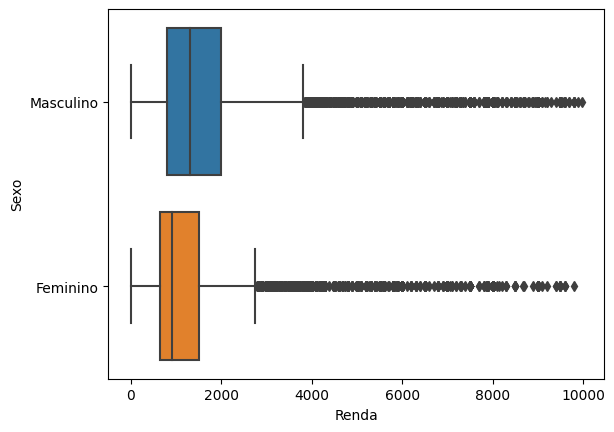

In [ ]:
sns.boxplot(data=tabela,x=dados.query('Renda<10000').Renda,y=tabela.Sexo, orient='h')

<Axes: xlabel='Renda', ylabel='Cor'>

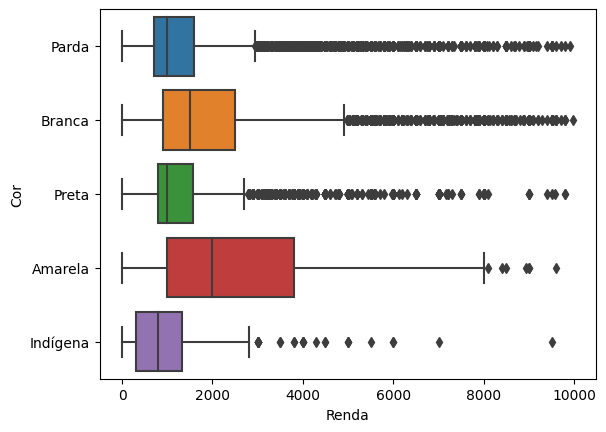

In [ ]:
sns.boxplot(data=tabela,x=dados.query('Renda<10000').Renda,y=tabela.Cor, orient='h')

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats
stats.percentileofscore(dados.Renda, 788, kind='weak')


28.867777199375325

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
dados.Renda.quantile(.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
renda_estudo_e_sexo=pd.crosstab(dados['Anos de Estudo'],
                       dados.Sexo,
                       aggfunc={'mean','median','max','std'},
                       values=dados.Renda)
renda_estudo_e_sexo.rename(columns=sexo,inplace=True)
renda_estudo_e_sexo

max                  mean                 median  \
Sexo           Masculino Feminino    Masculino     Feminino Masculino   
Anos de Estudo                                                          
1                  30000    10000   799.494638   516.201748     700.0   
2                  30000     2000   895.629047   492.771987     788.0   
3                  40000     4000   931.178986   529.911638     788.0   
4                  80000     3500  1109.203862   546.853916     800.0   
5                  50000    10000  1302.329283   704.279111    1000.0   
6                  35000     8000  1338.653218   781.389776    1045.0   
7                  25000     6000  1448.875419   833.732824    1200.0   
8                  40000     9000  1465.497940   830.751004    1200.0   
9                  30000    18000  1639.396667   933.615351    1300.0   
10                 60000    20000  1508.038850   868.021700    1200.0   
11                 45000     6000  1731.270847   925.919225    1218.0   
12                200000   100000  2117.060504  1286.790889    1500.0   
13                 30000   120000  2470.330776  1682.313725    1800.0   
14                 25000    20000  3195.099154  1911.730047    2400.0   
15                 50000    20000  3706.620269  2226.460457    2500.0   
16                200000   100000  6134.279790  3899.513231    4000.0   
17                  7000     3000  1295.761905   798.174419    1200.0   

                                 std               
Sexo           Feminino    Masculino     Feminino  
Anos de Estudo                                     
1                 390.0  1023.904884   639.311534  
2                 400.0  1331.950552   425.291842  
3                 450.0  1435.173827   498.234168  
4                 500.0  2143.800133   424.124446  
5                 788.0  1419.821787   629.553397  
6                 788.0  1484.650587   635.782641  
7                 788.0  1476.628602   574.547028  
8                 788.0  1419.708673   602.038029  
9                 800.0  1515.583715   896.781213  
10                788.0  2137.664774   973.221652  
11                800.0  2078.609734   620.611907  
12               1000.0  2676.538942  1819.040417  
13               1200.0  2268.081538  4851.833513  
14               1300.0  2797.116800  2053.789771  
15               1600.0  3987.214974  2064.083336  
16               2800.0  7447.613594  4212.770709  
17                788.0   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='Renda', ylabel='Anos de Estudo'>

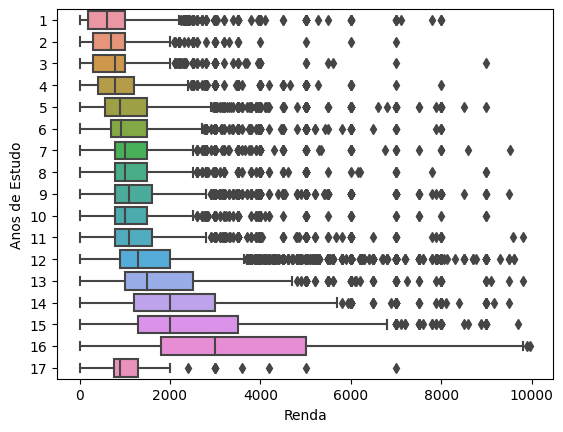

In [ ]:
sns.boxplot(data=dados,x=dados.query('Renda<10000').Renda,y=dados['Anos de Estudo'], orient='h')

<Axes: xlabel='Renda', ylabel='Anos de Estudo'>

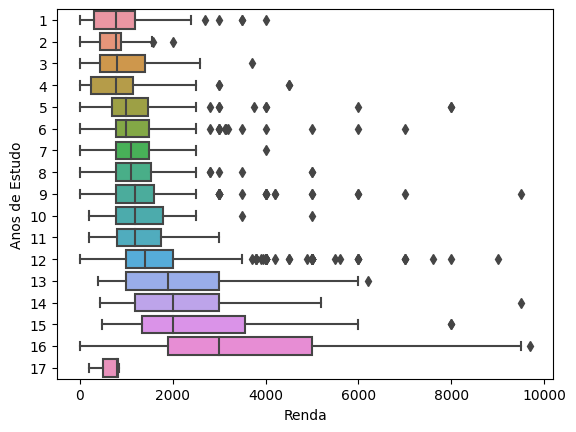

In [ ]:
sns.boxplot(data=dados,x=dados.query('Renda<10000 and Idade==40').Renda,y=dados['Anos de Estudo'], orient='h')

<Axes: xlabel='Renda', ylabel='Anos de Estudo'>

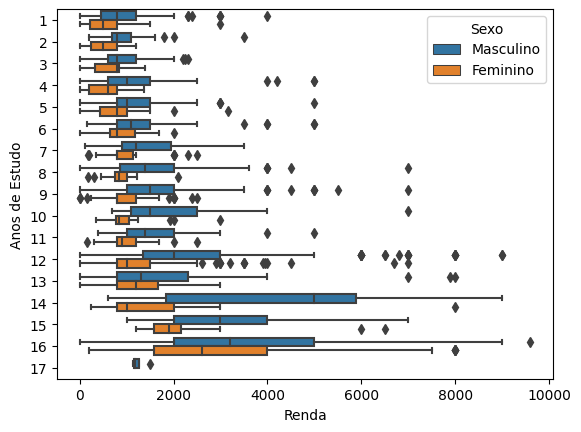

In [ ]:
sns.boxplot(data=dados,x=dados.query('Renda<10000 and Idade==50').Renda,y=dados['Anos de Estudo'], hue=tabela.Sexo, orient='h') #usar o hue para detalhar o dataframe

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
federacao=dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
federacao

Renda                             
                            mean  median     max          std
UF                                                           
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Maranhão             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paraná               2493.870753  1500.0  200000  4302.937995
Paraíba              1293.370487   788.0   30000  1950.272431
Pará                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piauí                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Sergipe              1109.111111   788.0   16000  1478.997878
São Paulo            2638.104986  1600.0   80000  3503.777366
Tocantins            1771.094946  1000.0   60000  2934.590741

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: xlabel='Renda', ylabel='UF'>

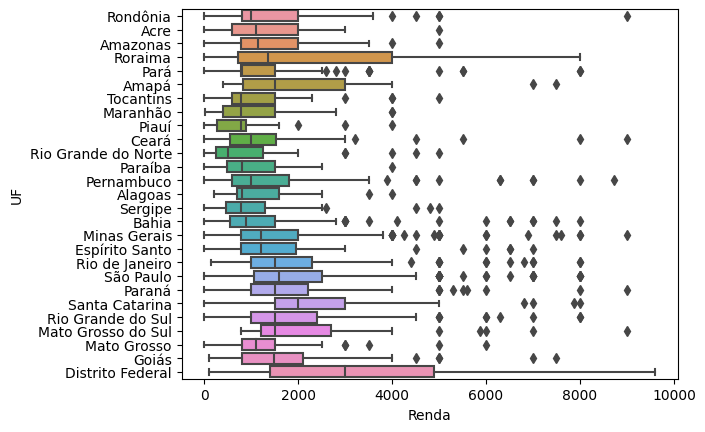

In [ ]:
sns.boxplot(data=dados,x=dados.query('Renda<10000 and Idade==50').Renda,y=dados['UF'], orient='h')

> ### Conclusões

Escreva suas conclusões aqui... Distrito Federal e Roraima possuem as maiores rendas do país, seguido do Amapá e Santa Catarina.